# 4-13 Report

**Notebook by Ryan Larson**

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("notebook", font_scale=1.5)

#from bqplot import pyplot as plt
from matplotlib import dates as mdates
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [102]:
import nbconvert
nbconvert.HTMLExporter.codefolding=True

In [2]:
!ls ../data/processed/scrape/4*

../data/processed/scrape/4-4:
day-agg.csv
day-lang-agg.csv
jan-archive.tar.bzip2

../data/processed/scrape/4-5:
all-gps.csv


## Languages


*Below:* A sample from our data.

In [3]:
lang_f = '../data/processed/scrape/4-4/day-lang-agg.csv'
lang_df = pd.read_csv(lang_f)

lang_df.head()

,day,language,count
0,2016-12-22,ar,4232
1,2016-12-22,ca,5
2,2016-12-22,cs,1
3,2016-12-22,de,90
4,2016-12-22,el,3


In [5]:
# sums of counts
language_total_count = lang_df[['language', 'count']].groupby('language').agg('sum')

# ...Sorted in order
language_total_count = language_total_count.reset_index().sort_values('count', ascending=False)
language_total_count.columns = ['language', 'tweets']

**Which language contributed the most tweets to our dataset?**

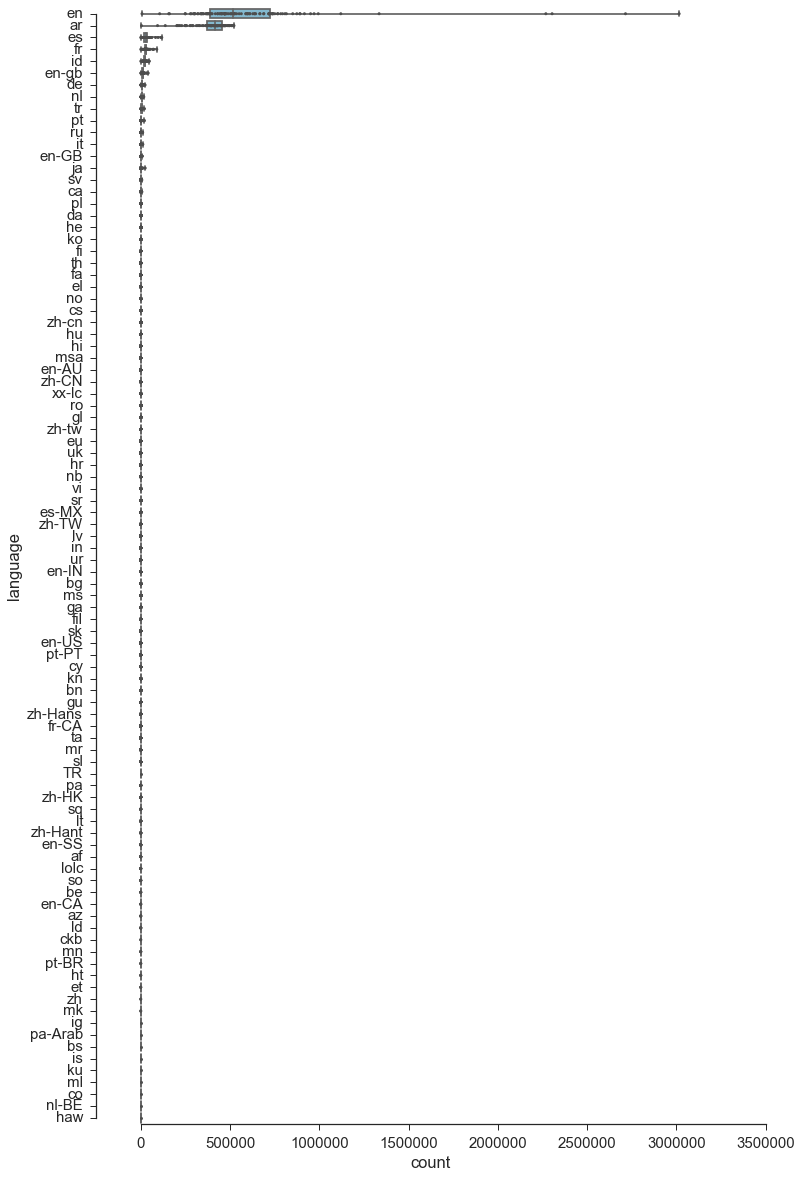

In [93]:
plt.figure(figsize=(12, 20))

ax = sns.boxplot(x='count', y='language', data=lang_df,
                 order=language_total_count.language.tolist(),
                whis=np.inf, color="c")

sns.stripplot(x='count', y='language', data=lang_df,
              order=language_total_count.language.tolist(),
             color='.3', linewidth=0, size=3)

# cleaner
plt.xlim((-250000))

#ax.set_xscale('log')
sns.despine(trim=True)

In [7]:
### Aliases

def assign_alias(lang):
    aliases = {
        'ar': 'Arabic',
        'en': 'English',
        'en-AU': 'English',
        'en-CA': 'English',
        'en-gb': 'English',
        'en-in': 'English',
        'en-US': 'English',
        'es': 'Spanish',
        'es-MX': 'Spanish',
        'fr': 'French',
        'fr-CA': 'French',
        'id': 'Indian'
    }
    try:
        return aliases[lang]
    except:
        return None

# Create new column
lang_df['alias'] = lang_df.language.map(assign_alias)

In [8]:
# aliases
alias_df = lang_df[pd.notnull(lang_df.alias)]

# sums of counts
alias_total_count = alias_df[['alias', 'count']].groupby('alias').agg('sum')

# ...Sorted in order
alias_total_count = alias_total_count.reset_index().sort_values('count', ascending=False)

**Which (grouped) languages are showing?
How does the major contributor's distributions look?**

In [9]:
### Ban day

def assign_ban_day(day):
    if day == '2017-01-29':
        return True
    else:
        return False
    
alias_df['ban_day'] = alias_df.day.map(assign_ban_day)
lang_df['ban_day'] = lang_df.day.map(assign_ban_day)

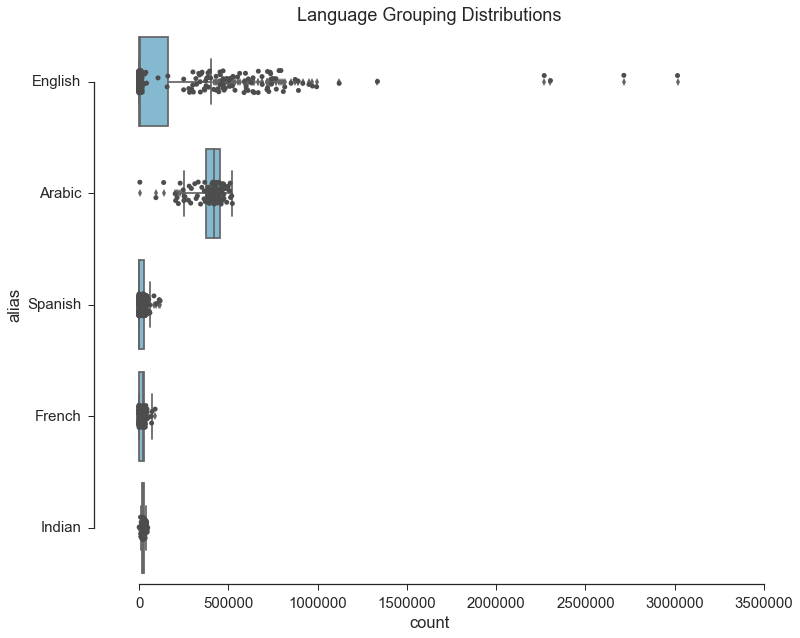

In [91]:
plt.figure(figsize=(12, 10))

ax = sns.boxplot(x='count', y='alias', data=alias_df,
                 order=alias_total_count.alias.tolist(),
                 color="c")

sns.stripplot(x='count', y='alias', data=alias_df,
              order=alias_total_count.alias.tolist(),
             color='.3', linewidth=0, 
              size=5, jitter=True)

# Cleaner 
plt.xlim((-250000, 3500000))

# title
plt.title('Language Grouping Distributions')

#ax.set_xscale('log')
sns.despine(trim=True)

**Raw numbers:**

In [11]:
day_lang_counts = lang_df[['day', 'language']].groupby('day').language.nunique()

print ('Number of unique languages: {}'.format(lang_df.language.nunique()))
print ('Most common: {}, with {} tweets.'.format(language_total_count.language.iloc[0],
                                                language_total_count['tweets'].iloc[0]))
print ('Average number of languages seen per day: {}'.format(day_lang_counts.mean()))

Number of unique languages: 94
Most common: en, with 64925541 tweets.
Average number of languages seen per day: 61.8173076923


**Diversity (unique) Languages**

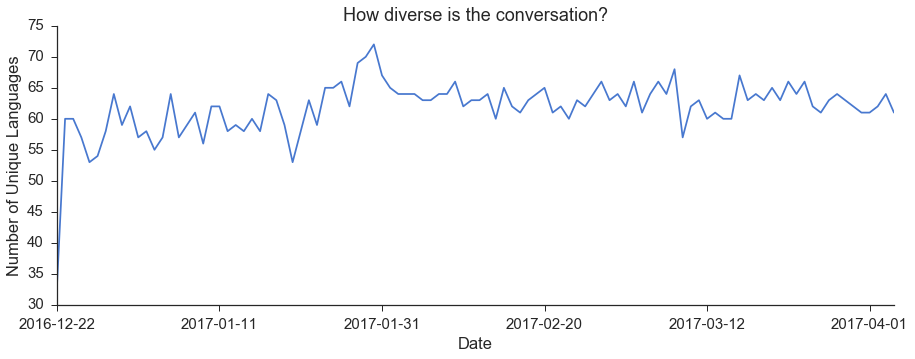

In [94]:
plt.figure(figsize=(15, 5))
ax = day_lang_counts.plot()

plt.title('How diverse is the conversation?')
plt.xlabel('Date')
plt.ylabel('Number of Unique Languages')
sns.despine()

## Dates

In [13]:
dates = pd.to_datetime(lang_df.day)

count_by_day = lang_df[['day', 'count']].groupby('day').agg('sum')
count_by_day.reset_index(inplace=True)

**Raw numbers:**

In [14]:
print ('There are {} unique days in the dataset.'.format(dates.nunique()))
earliest_date = dates.min().date()
print ('Earliest date: {}'.format(earliest_date))
latest_date = dates.max().date()
print ('Latest date: {}'.format(latest_date))

most_tweeted_day = count_by_day.iloc[count_by_day['count'].idxmax()]
print ('Day with most tweets: {}'.format(most_tweeted_day['day']))
print ('... It had {} tweets'.format(most_tweeted_day['count']))

There are 104 unique days in the dataset.
Earliest date: 2016-12-22
Latest date: 2017-04-04
Day with most tweets: 2017-01-29
... It had 3708254 tweets


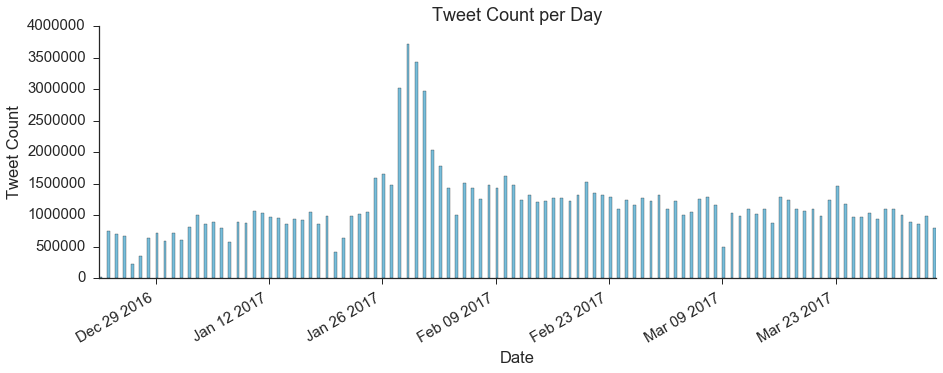

In [82]:
# Counts by day!
fig, ax = plt.subplots(1, figsize=(15, 5))

# Fix date axes
ax.xaxis_date()
fig.autofmt_xdate()

# plot the values
plot_day_count = ax.bar(count_by_day.index, count_by_day['count'].tolist(),
                    color='c', width=0.35)

# axis stuff
plt.title('Tweet Count per Day')
plt.xlabel('Date')
plt.ylabel('Tweet Count')

sns.despine()
plt.autoscale()

## GPS

*Below:* Sample from our gps file.

In [95]:
gps_f = '../data/processed/scrape/4-5/all-gps.csv'
gps_df = pd.read_csv(gps_f, parse_dates=['day'],
                         infer_datetime_format=True)

In [96]:
# calculate the real values for the gps
gps_df.rename(columns={'wo_gps': 'total'}, inplace=True)
gps_df['wo_gps'] = gps_df.total - gps_df.gps

In [99]:
gps_df.head()

,day,language,gps,total,wo_gps
0,2016-12-22,ar,348,8464,8116
1,2016-12-22,ca,0,10,10
2,2016-12-22,cs,0,2,2
3,2016-12-22,de,12,180,168
4,2016-12-22,el,0,6,6


In [97]:
# group so we have counts by day
gps_by_day = gps_df[['day', 'gps', 'wo_gps']].groupby('day').agg('sum')
gps_by_day.index = gps_by_day.index.to_pydatetime()

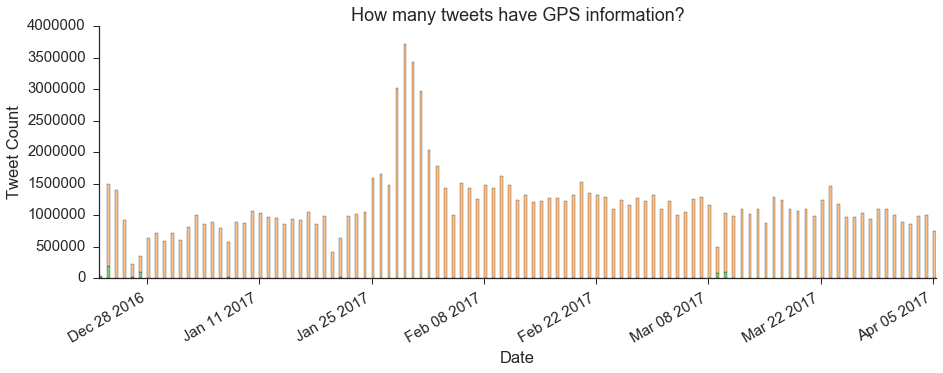

In [98]:
# GPS daily tallies
fig, ax = plt.subplots(1, figsize=(15, 5))

# Fix date axes
ax.xaxis_date()
fig.autofmt_xdate()

# plot the values
plot_wo_gps = ax.bar(gps_by_day.index, gps_by_day.wo_gps.tolist(),
                    color='#7fc97f', width=0.35)
plot_gps = ax.bar(gps_by_day.index, gps_by_day.gps.tolist(),
                 bottom=gps_by_day.wo_gps.tolist(),
                 color='#fdc086',  width=0.35)


# axis stuff
plt.title('How many tweets have GPS information?')
plt.xlabel('Date')
plt.ylabel('Tweet Count')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


# clean up
sns.despine()
plt.autoscale()